## ai hub 금융 합성 데이터

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 모든 열 보기 설정
pd.set_option('display.max_columns', None)
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [2]:
usecols = [
    '기준년월', '가명 식별자', '시도명','시군구명', '업종(대분류)', '업종(중분류)',
    '현금', '현금흐름', '영업활동현금흐름', '재무활동현금흐름',
    '유동자산', '비유동자산', '자산총계', '자산총계(전기)',
    '유동부채', '단기차입금', '부채총계', '자기자본(납입자본금)', '이익잉여금',
    'EBIT', 'EBITDA', '영업손익', '당기순이익', '이자비용',
    '부채비율', '유동비율', '이자보상배율', '차입금/EBITDA', 'EBITDA/금융비용',
    '매출액', '전기매출액', '영업이익증가율', '당기순이익증가율', 'EBITDA증가율',
    '매출액증가율', '총자산증가율', '유동자산증가율', '유형자산증가율',
    '자기자본이익률(ROE)', '총자산순이익률', '매출총이익율', '영업이익율', '당기순이익율',
    '기준년월 시점 대출연체 과목수',
    '기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 공공정보 (한국신용정보원) 유지건수(해제 제외)',
    '기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 발생건수(해제 제외)',
    '기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수',
    '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'
]

In [3]:
df_all = pd.read_csv('./결측치제거_l.csv', encoding="cp949")
print("전체:", df_all.shape)

df_reduced = pd.read_csv('./결측치제거_l.csv', usecols=usecols, encoding="cp949")
print("선택된 열만:", df_reduced.shape)

전체: (124989, 165)
선택된 열만: (124989, 53)


In [7]:
df_reduced.to_csv('aihub.csv',index=False, encoding='cp949')

In [8]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124989 entries, 0 to 124988
Data columns (total 53 columns):
 #   Column                                                                                   Non-Null Count   Dtype  
---  ------                                                                                   --------------   -----  
 0   기준년월                                                                                     124989 non-null  int64  
 1   가명 식별자                                                                                   124989 non-null  int64  
 2   업종(중분류)                                                                                  124989 non-null  object 
 3   유동자산                                                                                     124989 non-null  int64  
 4   비유동자산                                                                                    124989 non-null  int64  
 5   현금                                                 

## 변수 EDA

In [44]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124989 entries, 0 to 124988
Columns: 165 entries, 기준년월 to 시군구명
dtypes: float64(38), int64(122), object(5)
memory usage: 157.3+ MB


In [45]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124989 entries, 0 to 124988
Data columns (total 53 columns):
 #   Column                                                                                   Non-Null Count   Dtype  
---  ------                                                                                   --------------   -----  
 0   기준년월                                                                                     124989 non-null  int64  
 1   가명 식별자                                                                                   124989 non-null  int64  
 2   업종(중분류)                                                                                  124989 non-null  object 
 3   유동자산                                                                                     124989 non-null  int64  
 4   비유동자산                                                                                    124989 non-null  int64  
 5   현금                                                 

🧩 컬럼 분류 및 설명 (범주별)
① 기본 정보
컬럼명	설명
기준년월	데이터 기준 시점(YYYYMM)
가명 식별자	기업 식별을 위한 익명화 ID
업종(대분류)	대분류 업종명
업종(중분류)	중분류 업종명
시도명	기업 사업장 위치의 시도
시군구명	기업 사업장 위치의 시군구

② 재무상태표 지표
컬럼명	설명
유동자산	당좌자산+재고자산 등 단기 자산
비유동자산	유형자산, 무형자산, 투자자산 등 장기 자산
현금	보유 현금 및 현금성 자산
자산총계	총 자산 (유동 + 비유동)
자산총계(전기)	전기(이전 기간) 기준 자산총계
유동부채	단기부채 (1년 이내 상환 의무)
단기차입금	단기 차입금
부채총계	유동 + 비유동 부채 합
자기자본(납입자본금)	납입자본금 기준 자기자본
이익잉여금	누적된 이익에서 배당을 제외하고 남은 잉여금

③ 손익계산서 지표
컬럼명	설명
매출액	당기 매출 총액
전기매출액	전기 매출 총액
영업손익	영업이익 또는 손실
당기순이익	세금 등 다 제하고 남은 최종 이익
EBIT	이자·세전 영업이익
EBITDA	감가상각전 영업이익

④ 현금흐름 관련
컬럼명	설명
현금흐름	총 현금 흐름
영업활동현금흐름	영업에서 발생한 현금 흐름df_reduced
재무활동현금흐름	차입, 상환 등 재무활동 관련 흐름

⑤ 수익성·성장성·비율 지표
컬럼명	설명
이자비용	이자 비용 총합
이자보상배율	EBIT ÷ 이자비용
총자산증가율	자산 성장률
부채비율	부채 ÷ 자본
유동비율	유동자산 ÷ 유동부채
매출액증가율	매출 성장률
영업이익율	영업이익 ÷ 매출
당기순이익율	당기순이익 ÷ 매출
자기자본이익률(ROE)	순이익 ÷ 자기자본
총자산순이익률	순이익 ÷ 자산총계
유동자산증가율	유동자산 성장률
유형자산증가율	유형자산 성장률
매출총이익율	매출총이익 ÷ 매출액
영업이익증가율	영업이익 성장률
당기순이익증가율	당기순이익 성장률
EBITDA증가율	EBITDA 성장률
차입금/EBITDA	재무 건전성 지표
EBITDA/금융비용	이자 감당 능력

⑥ 연체 및 신용 정보
컬럼명	설명
기준년월 시점 대출연체 과목수	해당 시점 연체 중인 과목 수
기준년월 시점 3개월내~3년내 연체 유지 과목수	연체가 지속된 기간별 과목 수
기준년월 시점 연체일수가 30일 이상 된 과목수	장기 연체 과목 수
기준년월 시점 신용도판단정보 및 공공정보 발생건수	신용정보원 제공
기준년월 시점 공공정보 유지건수	현재 유지중인 공공정보
기준년월 시점 신용정보 해제일로부터 경과일수	마지막 해제 이후 기간 (일 수 기준)

⑦ 목표 변수 (Y값)
컬럼명	설명
기준일로부터 향후 1년내 부도, 기업회생 등 발생여부	부도 예측 타겟 (1: 부도, 0: 정상)

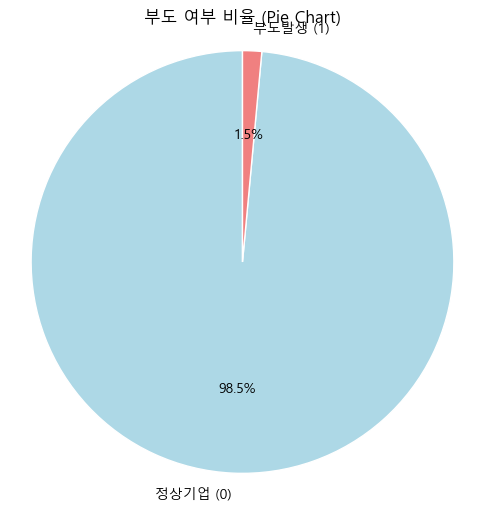

In [49]:
# 타겟 컬럼명
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'

# 비율 계산
target_dist = df_reduced[target_col].value_counts(normalize=True)

# 라벨 설정
labels = ['정상기업 (0)', '부도발생 (1)']
colors = ['lightblue', 'lightcoral']

# 원형그래프 시각화
plt.figure(figsize=(6, 6))
plt.pie(target_dist, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('부도 여부 비율 (Pie Chart)')
plt.axis('equal')  # 원형 유지
plt.show()

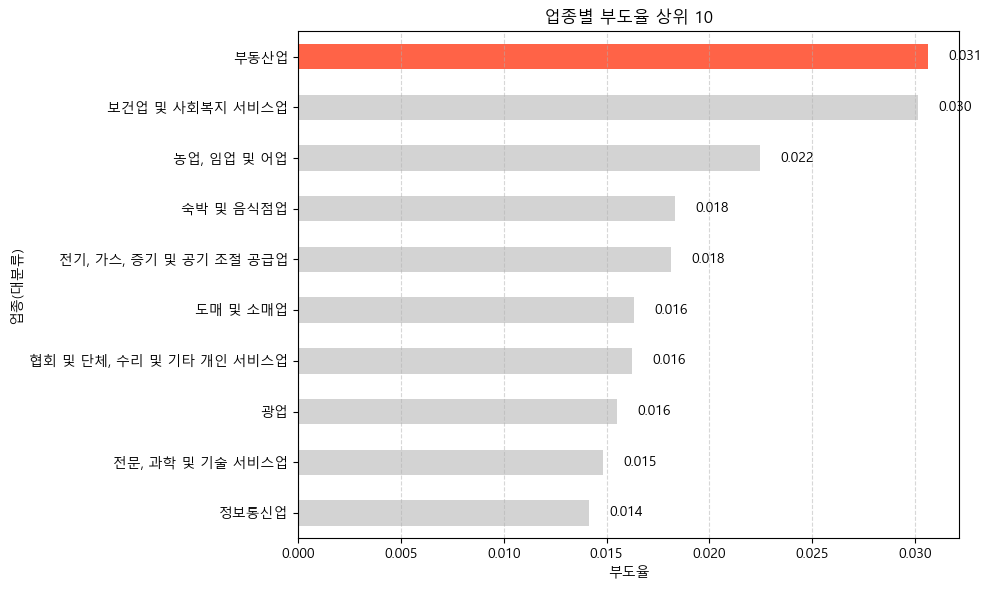

In [64]:
# 부도율 상위 10개 업종
top10 = df_reduced.groupby('업종(대분류)')[target_col].mean().sort_values(ascending=False).head(10)

colors = ['tomato' if idx == '부동산업' else 'lightgray' for idx in top10.index]

plt.figure(figsize=(10, 6))
top10.plot(kind='barh', color=colors)
plt.title('업종별 부도율 상위 10')
plt.xlabel('부도율')
plt.gca().invert_yaxis()

# 수치 표시
for i, v in enumerate(top10):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

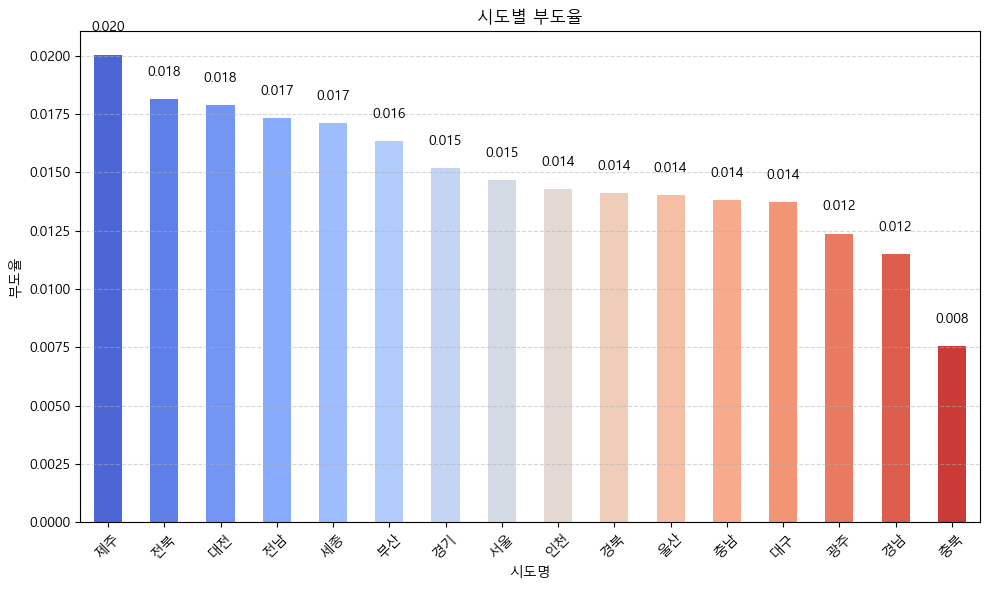

In [71]:
# 시도별 부도율 계산
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'
region_failure = df_reduced.groupby('시도명')[target_col].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(region_failure))
region_failure.plot(kind='bar', color=colors)
plt.title('시도별 부도율')
plt.ylabel('부도율')
plt.xticks(rotation=45)

# 수치 표시
for i, v in enumerate(region_failure):
    plt.text(i, v + 0.001, f'{v:.3f}', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

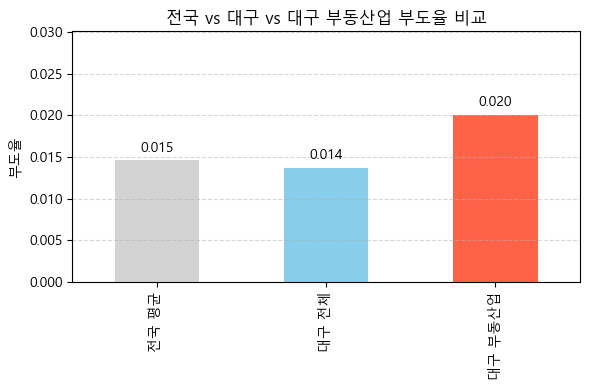

In [74]:
# 타겟 변수명
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'

# 전체 평균 부도율
total_mean = df_reduced[target_col].mean()

# 대구 전체
daegu_mean = df_reduced[df_reduced['시도명'] == '대구'][target_col].mean()

# 대구 + 부동산업
daegu_real_estate = df_reduced[
    (df_reduced['시도명'] == '대구') &
    (df_reduced['업종(대분류)'] == '부동산업')
]
daegu_real_mean = daegu_real_estate[target_col].mean()

# 비교를 위한 시리즈 생성
compare_series = pd.Series({
    '전국 평균': total_mean,
    '대구 전체': daegu_mean,
    '대구 부동산업': daegu_real_mean
})

# 시각화
plt.figure(figsize=(6, 4))
colors = ['lightgray', 'skyblue', 'tomato']
compare_series.plot(kind='bar', color=colors)

# 수치 표시
for i, v in enumerate(compare_series):
    plt.text(i, v + 0.001, f'{v:.3f}', ha='center')

plt.title('전국 vs 대구 vs 대구 부동산업 부도율 비교')
plt.ylabel('부도율')
plt.ylim(0, compare_series.max() + 0.01)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

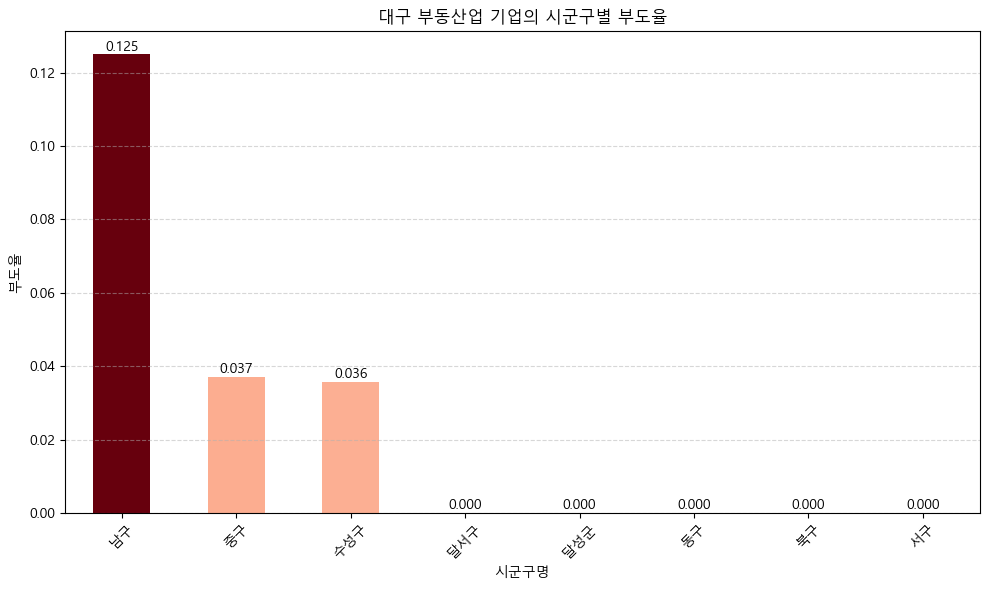

In [75]:
# 타겟 컬럼
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'

# 대구 + 부동산업 데이터 필터링
df_daegu_real = df_reduced[
    (df_reduced['시도명'] == '대구') &
    (df_reduced['업종(대분류)'] == '부동산업')
]

# 시군구별 부도율 계산
gu_failure = df_daegu_real.groupby('시군구명')[target_col].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
colors = plt.cm.Reds(gu_failure / gu_failure.max())  # 부도율 비율로 색상 진하게

gu_failure.plot(kind='bar', color=colors)
plt.title('대구 부동산업 기업의 시군구별 부도율')
plt.ylabel('부도율')
plt.xticks(rotation=45)

# 수치 표시
for i, v in enumerate(gu_failure):
    plt.text(i, v + 0.001, f'{v:.3f}', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

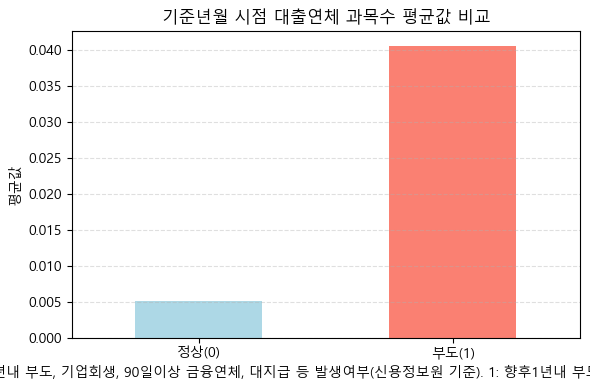

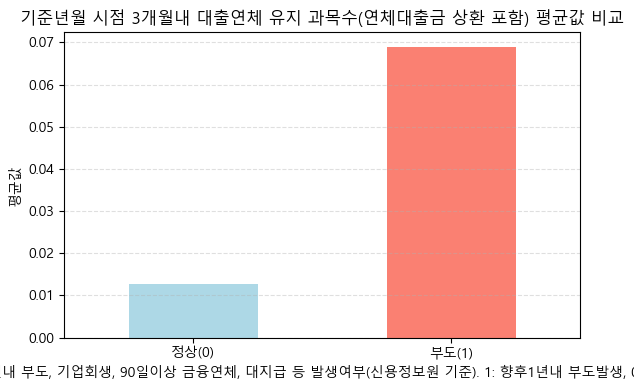

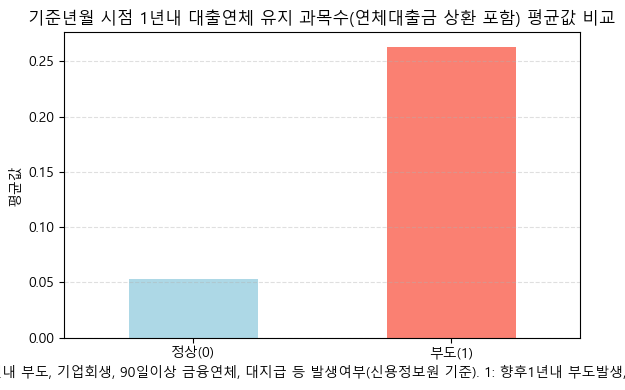

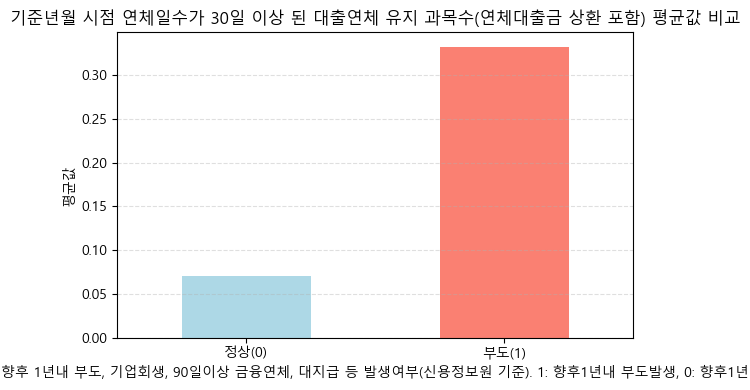

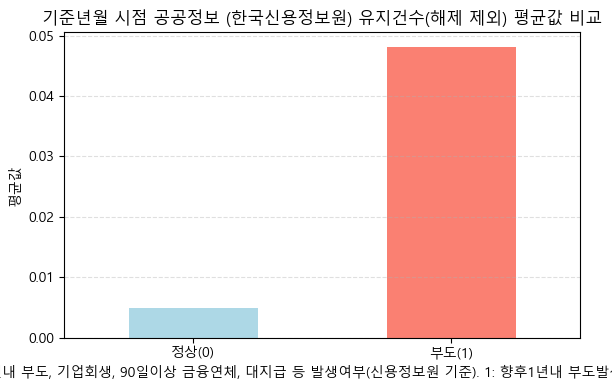

In [72]:
# 타겟 정의
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'

# 연체 관련 변수 리스트
delay_vars = [
    '기준년월 시점 대출연체 과목수',
    '기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 공공정보 (한국신용정보원) 유지건수(해제 제외)'
]

# 정상 vs 부도 그룹별 평균 비교 시각화
for col in delay_vars:
    group_means = df_reduced.groupby(target_col)[col].mean()
    
    plt.figure(figsize=(6, 4))
    group_means.plot(kind='bar', color=['lightblue', 'salmon'])
    plt.title(f'{col} 평균값 비교')
    plt.xticks([0, 1], ['정상(0)', '부도(1)'], rotation=0)
    plt.ylabel('평균값')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

## 부동산 pf 핵심은 시행사다
- 부동산업
- 시설자금대출

## 샘플 테스트 10%
## 머신러닝 기반 경향성 분석, SVM

In [83]:
print(y.value_counts(normalize=True))

기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생
0    0.97992
1    0.02008
Name: proportion, dtype: float64


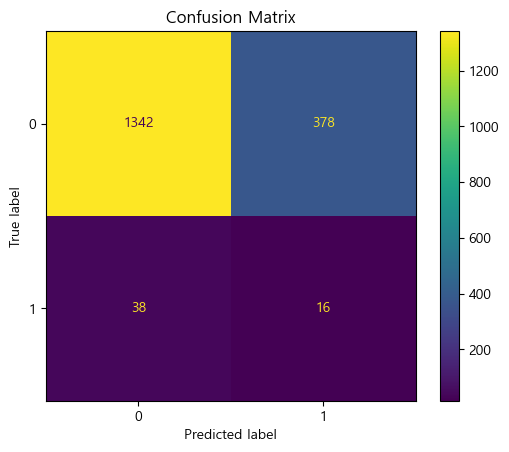

              precision    recall  f1-score   support

           0     0.9725    0.7802    0.8658      1720
           1     0.0406    0.2963    0.0714        54

    accuracy                         0.7655      1774
   macro avg     0.5065    0.5383    0.4686      1774
weighted avg     0.9441    0.7655    0.8416      1774



In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  타겟 컬럼명
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'

#  1. 부동산업만 필터링
df_focus = df_reduced[df_reduced['업종(대분류)'] == '부동산업'].copy()

#  2. X / y 분리
X = df_focus.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target_col, '기준년월', '가명 식별자'], errors='ignore'
)
y = df_focus[target_col]

#  2. NaN & Inf 처리 (중요!)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균으로 대체

#  3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  4. 스케일링 (SVM은 필수)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  5. SMOTE 오버샘플링
smote = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

#  6. SVM 학습 (클래스 불균형 반영)
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

#  7. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

#  8. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#  9. Classification Report 출력
print(classification_report(y_test, y_pred, digits=4))

🔍 Confusion Matrix
[[3440  254]
 [  48    8]]

🔍 Classification Report
              precision    recall  f1-score   support

           0     0.9862    0.9312    0.9580      3694
           1     0.0305    0.1429    0.0503        56

    accuracy                         0.9195      3750
   macro avg     0.5084    0.5370    0.5041      3750
weighted avg     0.9720    0.9195    0.9444      3750



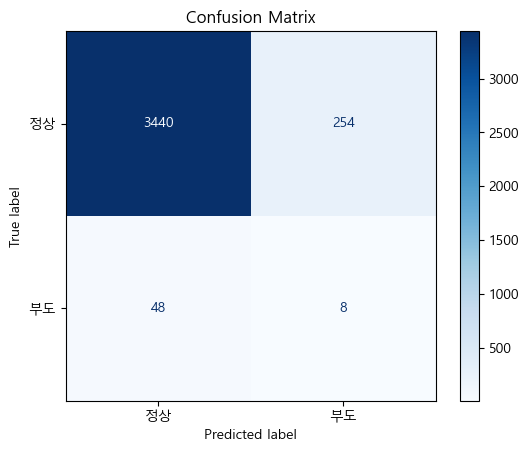

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#  타겟 컬럼
target_col = '기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생'

#  1. 10% 샘플링
df_sample = df_reduced.sample(frac=0.1, random_state=42)

#  2. X / y 분리
X = df_sample.select_dtypes(include=['int64', 'float64']).drop(columns=[target_col])
y = df_sample[target_col]

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

#  3. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  4. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  5. SVM 훈련 (불균형 데이터 대응)
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

#  6. 예측
y_pred = svm_model.predict(X_test_scaled)

#  7. 성능 평가
print("🔍 Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n🔍 Classification Report")
print(classification_report(y_test, y_pred, digits=4))

#  8. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                              display_labels=["정상", "부도"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

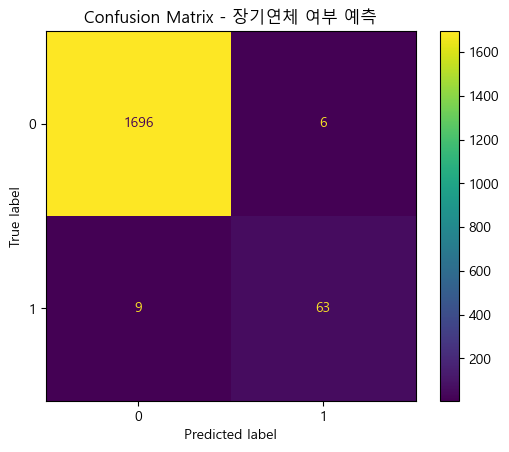

              precision    recall  f1-score   support

           0     0.9947    0.9965    0.9956      1702
           1     0.9130    0.8750    0.8936        72

    accuracy                         0.9915      1774
   macro avg     0.9539    0.9357    0.9446      1774
weighted avg     0.9914    0.9915    0.9915      1774



In [90]:
#  새로운 타겟 컬럼 (장기연체여부: 30일 초과 연체 과목 수 > 0 → 1)
target_col = '장기연체여부'

#  1. 부동산업 필터링
df_focus = df_reduced[df_reduced['업종(대분류)'] == '부동산업'].copy()

#  2. 타겟 변수 생성
df_focus[target_col] = (df_focus['기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)'] > 0).astype(int)

#  3. X / y 분리
X = df_focus.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target_col, '기준년월', '가명 식별자'], errors='ignore'
)
y = df_focus[target_col]

#  4. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

#  5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#  6. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  7. SMOTE + 클래스 불균형 반영
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

#  8. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

#  9. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

#  10. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 장기연체 여부 예측")
plt.grid(False)
plt.show()

#  11. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

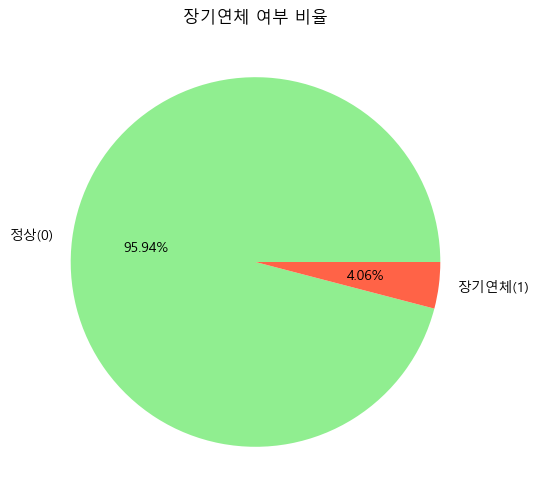

In [91]:
plt.figure(figsize=(6, 6))
df_focus['장기연체여부'].value_counts().sort_index().plot(
    kind='pie', labels=['정상(0)', '장기연체(1)'], autopct='%.2f%%', colors=['lightgreen', 'tomato'])
plt.title('장기연체 여부 비율')
plt.ylabel('')  # y축 라벨 제거
plt.show()

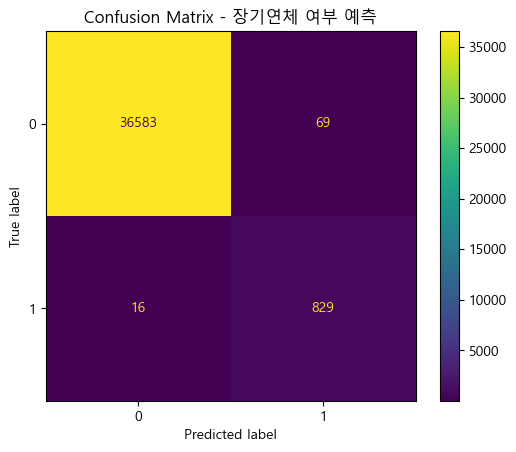

              precision    recall  f1-score   support

           0     0.9996    0.9981    0.9988     36652
           1     0.9232    0.9811    0.9512       845

    accuracy                         0.9977     37497
   macro avg     0.9614    0.9896    0.9750     37497
weighted avg     0.9978    0.9977    0.9978     37497



In [92]:
# 🎯 새로운 타겟 컬럼 (장기연체여부: 30일 초과 연체 과목 수 > 0 → 1)
target_col = '장기연체여부'

# ✅ 2. 타겟 변수 생성
df_reduced[target_col] = (df_reduced['기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)'] > 0).astype(int)

# ✅ 3. X / y 분리
X = df_reduced.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target_col, '기준년월', '가명 식별자'], errors='ignore'
)
y = df_reduced[target_col]

# ✅ 4. NaN / Inf 처리
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())  # 평균 대체

# ✅ 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ 6. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 7. SMOTE + 클래스 불균형 반영
smote = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# ✅ 8. SVM 모델 학습
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale', random_state=42)
svm_model.fit(X_res, y_res)

# ✅ 9. 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)

# ✅ 10. Confusion Matrix 시각화
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - 장기연체 여부 예측")
plt.grid(False)
plt.show()

# ✅ 11. 성능 지표 출력
print(classification_report(y_test, y_pred, digits=4))

## 대구

In [5]:
daegu = df_reduced[df_reduced['시도명']=='대구']
daegu

,기준년월,가명 식별자,유동자산,비유동자산,현금,자산총계,자산총계(전기),유동부채,단기차입금,부채총계,자기자본(납입자본금),이익잉여금,매출액,전기매출액,영업손익,당기순이익,현금흐름,영업활동현금흐름,재무활동현금흐름,이자비용,이자보상배율,EBIT,EBITDA,총자산증가율,부채비율,유동비율,매출액증가율,영업이익율,당기순이익율,자기자본이익률(ROE),총자산순이익률,유동자산증가율,유형자산증가율,매출총이익율,영업이익증가율,당기순이익증가율,EBITDA증가율,차입금/EBITDA,EBITDA/금융비용,기준년월 시점 대출연체 과목수,기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함),기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함),기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함),기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함),기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함),기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 발생건수(해제 제외),기준년월 시점 공공정보 (한국신용정보원) 유지건수(해제 제외),기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수,"기준일로부터 향후 1년내 부도, 기업회생, 90일이상 금융연체, 대지급 등 발생여부(신용정보원 기준). 1: 향후1년내 부도발생, 0: 향후1년내 부도미발생",업종(대분류),시도명,시군구명
119,20210801,54015,1939140037,1390750989,0,3329891026,3070033942,861121705,280330258,984881806,49170000,1663052473,3478790119,2821580148,-240763011,-268180151,249924865,239600746,300191885,1004,0.00,-310395496,-265297548,7.80,42.15,225.19,23.29,-6.92,-7.710000,-0.11,-8.050000,0.01,4.68,-3.22,3110.03,-21.42,832.50,0.00,-264240.59,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,북구
124,20210801,32055,2201509547,1070317166,5807,3271826713,3268220775,908993549,227325356,1932337085,95860000,-799226190,1941047674,1525679572,87807106,-225324830,319063730,-287475006,1408083690,24712130,0.12,-224317748,114111843,0.11,275.77,242.19,27.23,4.52,-11.610000,-0.32,-6.890000,0.06,71.13,7.78,-222.26,647.01,-26.48,0.05,4.62,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,달서구
224,20210801,69041,372154569,1349773772,0,1721928341,1578489541,131734239,0,178333711,14809000,546375887,1076793664,1333208003,54243367,123694034,-58503206,171771464,-134924392,12561,0.00,96926145,128655479,8.33,12.42,282.50,-19.23,5.04,11.490000,0.09,7.180000,0.01,-13.89,13.96,65.47,313.70,55.00,0.00,10241.64,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,달서구
231,20210801,59563,855142876,789714304,30575,1644857180,1335389692,747783079,242941515,885449527,48542000,318795414,1772229307,1277467995,98316113,100626399,23028181,29116162,98642401,9865610,0.48,83465031,142035691,18.81,174.03,114.36,38.73,5.55,5.680000,0.20,6.120000,0.01,7.61,18.75,2104.41,-18.75,28.00,0.07,14.18,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,달성군
309,20210801,110027,630009340,626757072,0,1256766412,1348796148,105765904,0,108236969,2600000,1124718765,814689825,1033353810,108851086,84071105,39560641,213848687,-356127,3556,0.00,62333752,131680587,-7.32,7.99,595.66,-21.16,13.36,10.320000,0.06,6.690000,0.01,4.73,21.97,371.90,-9.25,6.00,0.00,36315.66,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,달서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124905,20210801,132799,11996,20728,0,32724,38442,1553,0,2931,10000,-32603,129930,296768,5957,5471,0,0,0,0,0.00,5479,5986,-17.47,-12.97,772.44,-56.22,4.58,4.210729,-0.24,16.718616,0.01,-40.22,100.00,-54.98,-77.25,0.00,0.00,0.00,0,0,0,0,0,0,0,0,999999999,0,교육 서비스업,대구,달서구
124910,20210801,60769,31230,0,0,31230,36670,165274,8010,176611,100000,-100661,92095,65009,-13072,-11775,0,0,0,0,0.00,-11759,-12953,-17.42,-26718.76,18.90,41.67,-14.19,-12.785710,17.81,-37.704131,0.00,0.00,37.88,-194.68,-100.87,0.00,0.00,0.00,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,북구
124913,20210801,28204,27241,3438,0,30679,50219,12635,0,12635,0,24900,510599,276550,58330,58345,0,0,0,0,0.00,58367,62236,-63.69,50.74,215.60,84.63,11.42,11.426775,2.34,190.178950,0.02,-10.37,33.84,-213.78,70.34,0.00,0.00,0.00,0,0,0,0,0,0,0,0,999999999,0,제조업,대구,중구
124967,20210801,147710,3815,8151,0,11966,42927,35073,34472,32866,5000,-45754,651,1322,-6407,-6382,0,0,0,0,0.00,-6382,-6408,-258.74,-80.64,10.88,-50.76,-984.18,-980.337942,0.16,-53.334448,0.01,-12.80,100.00,-120.90,-117.13,0.00,0.00,0.00,0,0,0,0,0,0,0,0,999999999,0,교육 서비스업,대구,중구


C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\2344191420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_sgg.values, y=avg_by_sgg.index, palette='Blues_d')


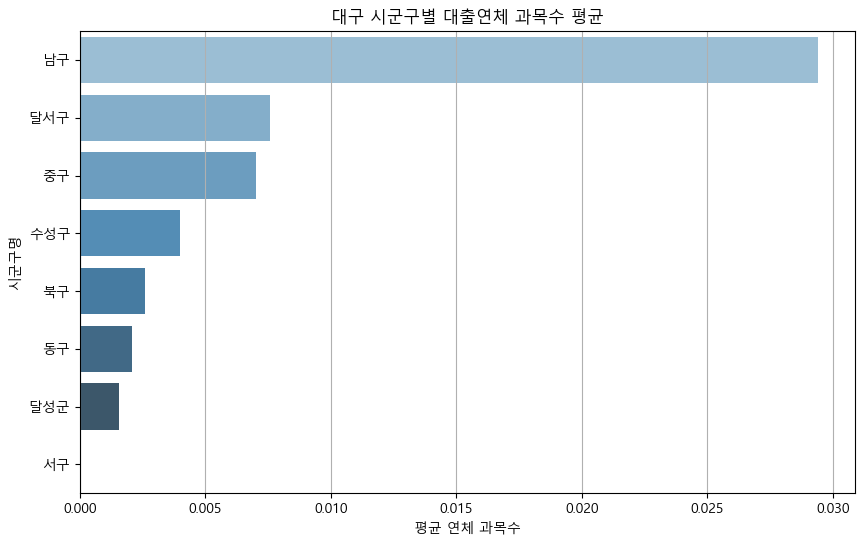

In [6]:
# 시군구별로 평균 연체 과목수 계산
avg_by_sgg = daegu.groupby('시군구명')['기준년월 시점 대출연체 과목수'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_by_sgg.values, y=avg_by_sgg.index, palette='Blues_d')
plt.title('대구 시군구별 대출연체 과목수 평균')
plt.xlabel('평균 연체 과목수')
plt.ylabel('시군구명')
plt.grid(axis='x')
plt.show()

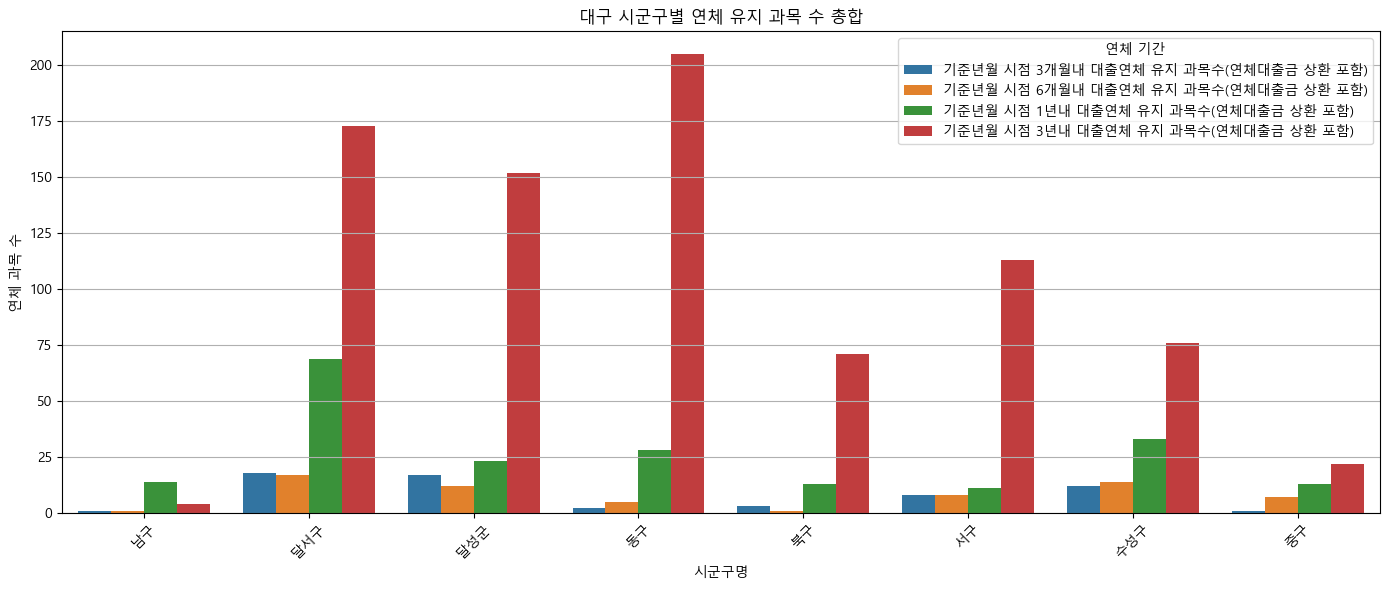

In [7]:
# 연체 유지 과목수 컬럼 리스트
delay_cols = [
    '기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)',
    '기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)'
]

# 시군구별로 합계 계산
delay_by_sgg = daegu.groupby('시군구명')[delay_cols].sum().reset_index()

# melt해서 긴 형태로 변환
delay_melted = delay_by_sgg.melt(id_vars='시군구명', var_name='연체 기간', value_name='연체 과목 수')

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=delay_melted, x='시군구명', y='연체 과목 수', hue='연체 기간')
plt.title('대구 시군구별 연체 유지 과목 수 총합')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\3792279292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daegu['연체여부'] = daegu['기준년월 시점 대출연체 과목수'] > 0
C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\3792279292.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate['연체 기업 수'] = grouped.apply(lambda x: x[x['연체여부']]['가명 식별자'].nunique())


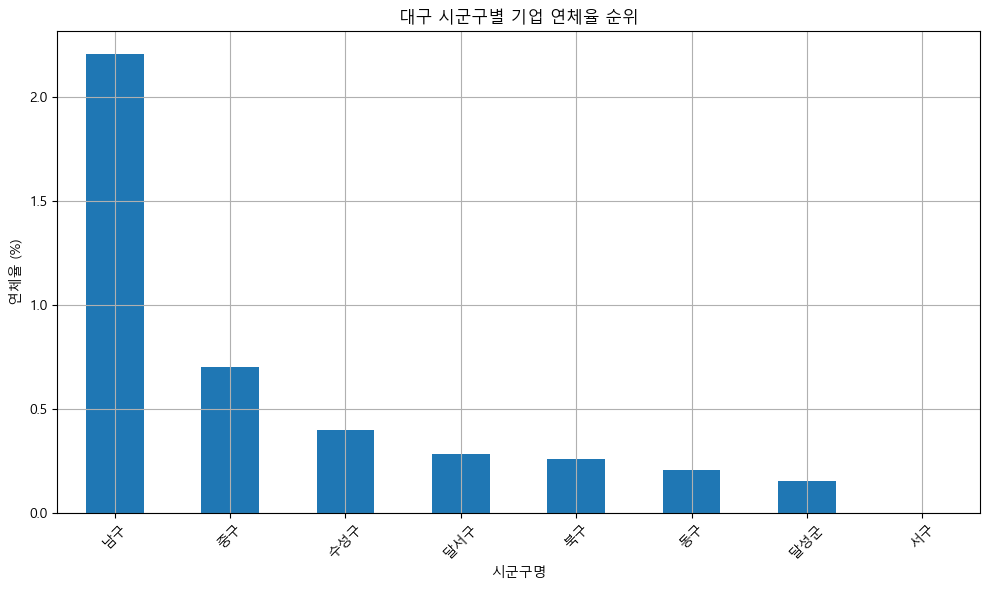

In [8]:
# 연체 여부 컬럼 만들기 (1건 이상이면 연체 기업)
daegu['연체여부'] = daegu['기준년월 시점 대출연체 과목수'] > 0

# 시군구별 그룹화
grouped = daegu.groupby('시군구명')

# 연체율 계산
df_rate = grouped['가명 식별자'].nunique().to_frame(name='기업 수')
df_rate['연체 기업 수'] = grouped.apply(lambda x: x[x['연체여부']]['가명 식별자'].nunique())
df_rate['연체율(%)'] = (df_rate['연체 기업 수'] / df_rate['기업 수']) * 100
df_rate = df_rate.sort_values(by='연체율(%)', ascending=False)

import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
df_rate['연체율(%)'].plot(kind='bar')
plt.title('대구 시군구별 기업 연체율 순위')
plt.ylabel('연체율 (%)')
plt.xlabel('시군구명')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

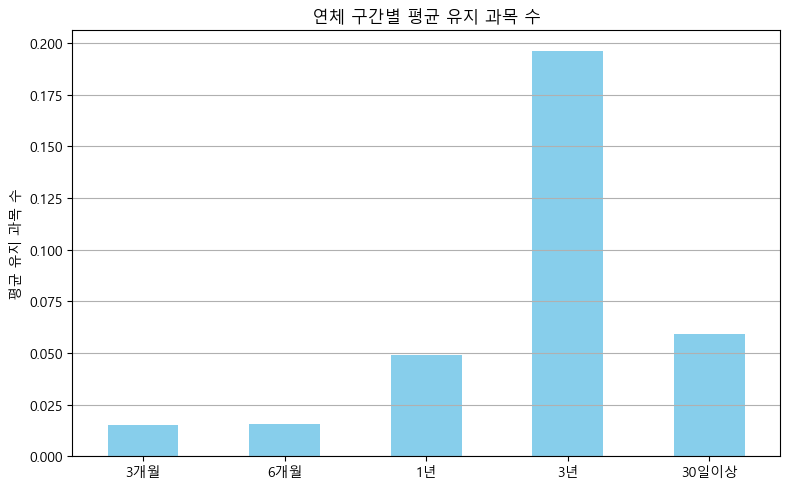

In [13]:
# 열 이름 간단히 줄이기
daegu = daegu.rename(columns={
    '기준년월 시점 3개월내 대출연체 유지 과목수(연체대출금 상환 포함)': '3개월',
    '기준년월 시점 6개월내 대출연체 유지 과목수(연체대출금 상환 포함)': '6개월',
    '기준년월 시점 1년내 대출연체 유지 과목수(연체대출금 상환 포함)': '1년',
    '기준년월 시점 3년내 대출연체 유지 과목수(연체대출금 상환 포함)': '3년',
    '기준년월 시점 연체일수가 30일 이상 된 대출연체 유지 과목수(연체대출금 상환 포함)': '30일이상'
})

# 컬럼 평균 계산
cols = ['3개월', '6개월', '1년', '3년', '30일이상']
avg_values = daegu[cols].mean()

# 막대그래프
plt.figure(figsize=(8, 5))
avg_values.plot(kind='bar', color='skyblue')
plt.title('연체 구간별 평균 유지 과목 수')
plt.ylabel('평균 유지 과목 수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

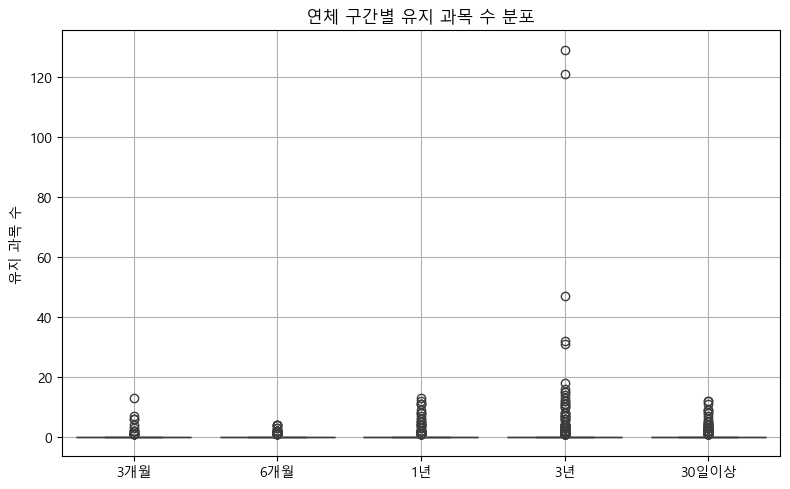

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=daegu[cols])
plt.title('연체 구간별 유지 과목 수 분포')
plt.ylabel('유지 과목 수')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

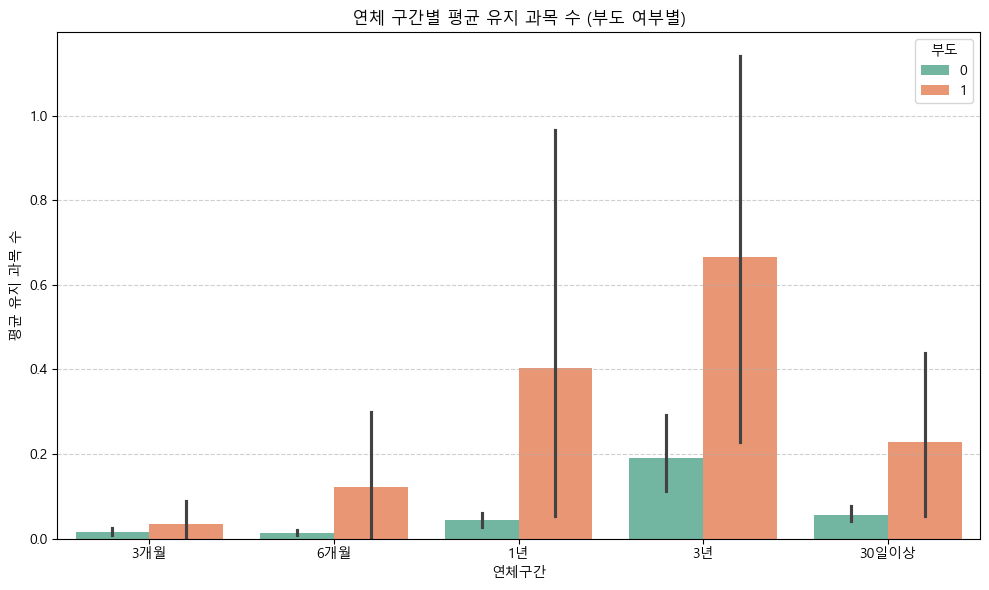

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt,
    x='연체구간',
    y='유지과목수',
    hue='부도',
    palette='Set2',
    errorbar='ci'
)

plt.title('연체 구간별 평균 유지 과목 수 (부도 여부별)')
plt.ylabel('평균 유지 과목 수')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

"해당 지역에 부도기업이 얼마나 많은가?"

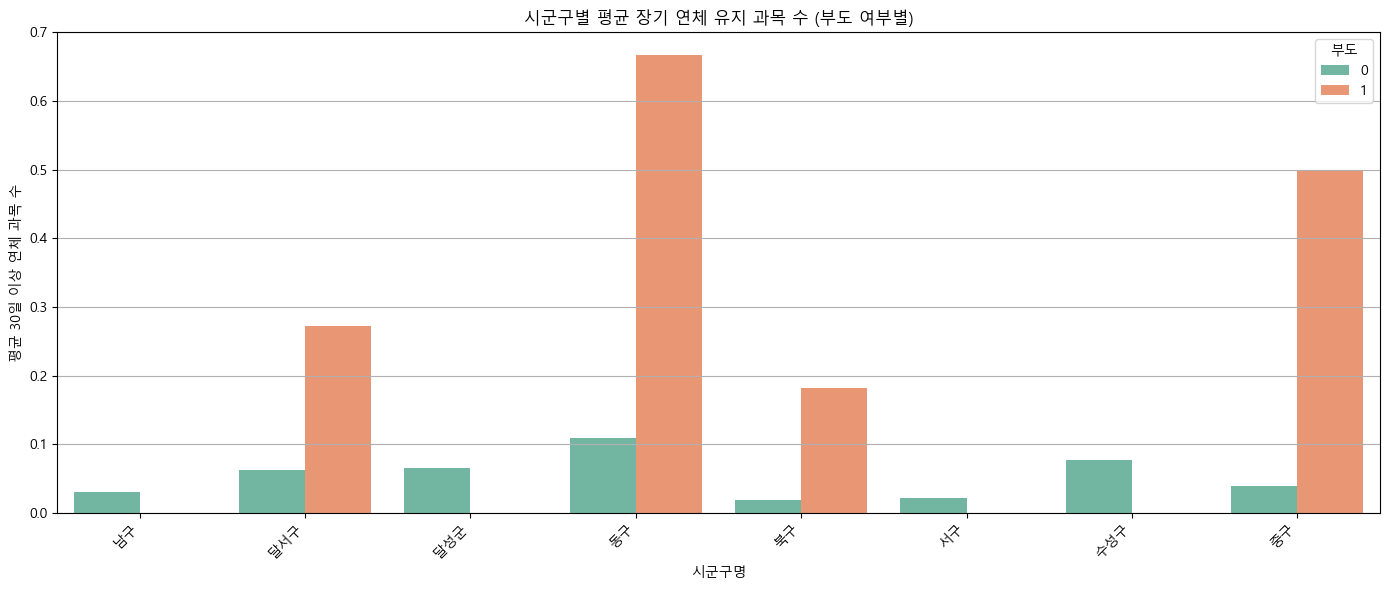

In [20]:
# 집계: 시군구-부도 그룹별 평균
grouped = daegu.groupby(['시군구명', '부도'])['30일이상'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='시군구명',
    y='30일이상',
    hue='부도',
    palette='Set2'
)

plt.title('시군구별 평균 장기 연체 유지 과목 수 (부도 여부별)')
plt.ylabel('평균 30일 이상 연체 과목 수')
plt.xlabel('시군구명')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

| 시군구명            | 부도 기업의 연체 평균   | 부도 없는 기업 대비     | 해석                        |
| --------------- | -------------- | --------------- | ------------------------- |
| **동구**          | 가장 높음 (\~0.67) | 뚜렷한 차이          | 해당 지역은 연체도 많고 부도율도 높을 가능성 |
| **북구, 중구**      | 부도 기업만 존재      | 위험 집중 지역 가능성    |                           |
| **달서구, 달성군**    | 격차 존재          | 비교적 온건하지만 주의 필요 |                           |
| **남구, 서구, 수성구** | 전체적으로 낮음       | 상대적으로 안정적       |                           |


C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\1447952386.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(summary_df.index, rotation=45, ha='right')


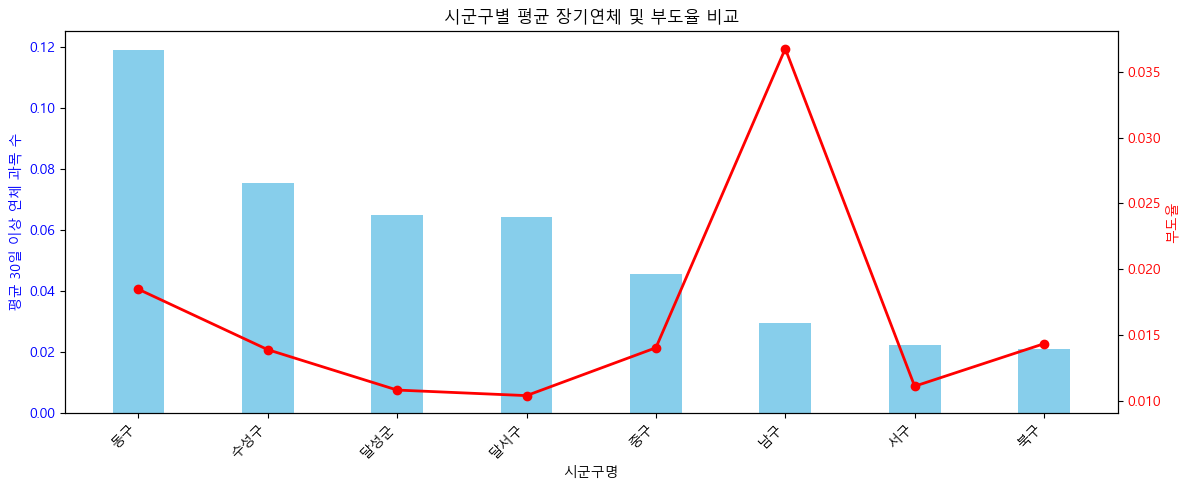

In [23]:
# 모든 시군구 리스트 확보 (누락 방지)
all_sgg = daegu['시군구명'].unique()

# 시군구별 평균 연체
avg_late = daegu.groupby('시군구명')['30일이상'].mean().reindex(all_sgg).fillna(0)

# 시군구별 부도율 (부도기업이 없던 시군구는 0으로)
boodoyul = daegu.groupby('시군구명')['부도'].mean().reindex(all_sgg).fillna(0)

# 합치기
summary_df = pd.concat([avg_late, boodoyul], axis=1)
summary_df.columns = ['평균_30일이상연체', '부도율']
summary_df = summary_df.sort_values('평균_30일이상연체', ascending=False)

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 5))

# 막대: 연체 평균
ax1.bar(summary_df.index, summary_df['평균_30일이상연체'], color='skyblue', width=0.4)
ax1.set_ylabel('평균 30일 이상 연체 과목 수', color='blue')
ax1.set_xlabel('시군구명')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(summary_df.index, rotation=45, ha='right')

# 선: 부도율
ax2 = ax1.twinx()
ax2.plot(summary_df.index, summary_df['부도율'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('부도율', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('시군구별 평균 장기연체 및 부도율 비교')
plt.tight_layout()
plt.show()

In [24]:
daegu[daegu['시군구명'] == '남구']['부도'].value_counts()

부도
0    131
1      5
Name: count, dtype: int64

      평균_30일이상연체       부도율   연체-부도차이
시군구명                                
동구      0.119097  0.018480  0.100616
수성구     0.075397  0.013889  0.061508
달성군     0.064915  0.010819  0.054096
달서구     0.064272  0.010397  0.053875
중구      0.045614  0.014035  0.031579
서구      0.022222  0.011111  0.011111
북구      0.020860  0.014342  0.006519
남구      0.029412  0.036765 -0.007353


C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\244704745.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df_sorted.reset_index(), x='시군구명', y='연체-부도차이', palette='viridis')


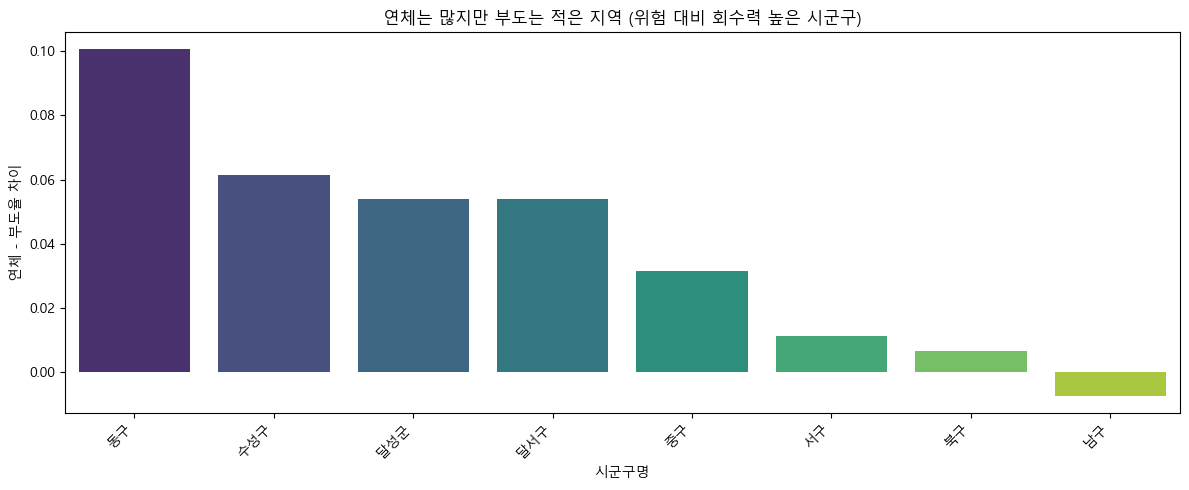

In [25]:
# 위 summary_df 활용
summary_df['연체-부도차이'] = summary_df['평균_30일이상연체'] - summary_df['부도율']
summary_df_sorted = summary_df.sort_values('연체-부도차이', ascending=False)

# 상위 n개 보기
print(summary_df_sorted.head(10))

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(data=summary_df_sorted.reset_index(), x='시군구명', y='연체-부도차이', palette='viridis')
plt.title('연체는 많지만 부도는 적은 지역 (위험 대비 회수력 높은 시군구)')
plt.ylabel('연체 - 부도율 차이')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

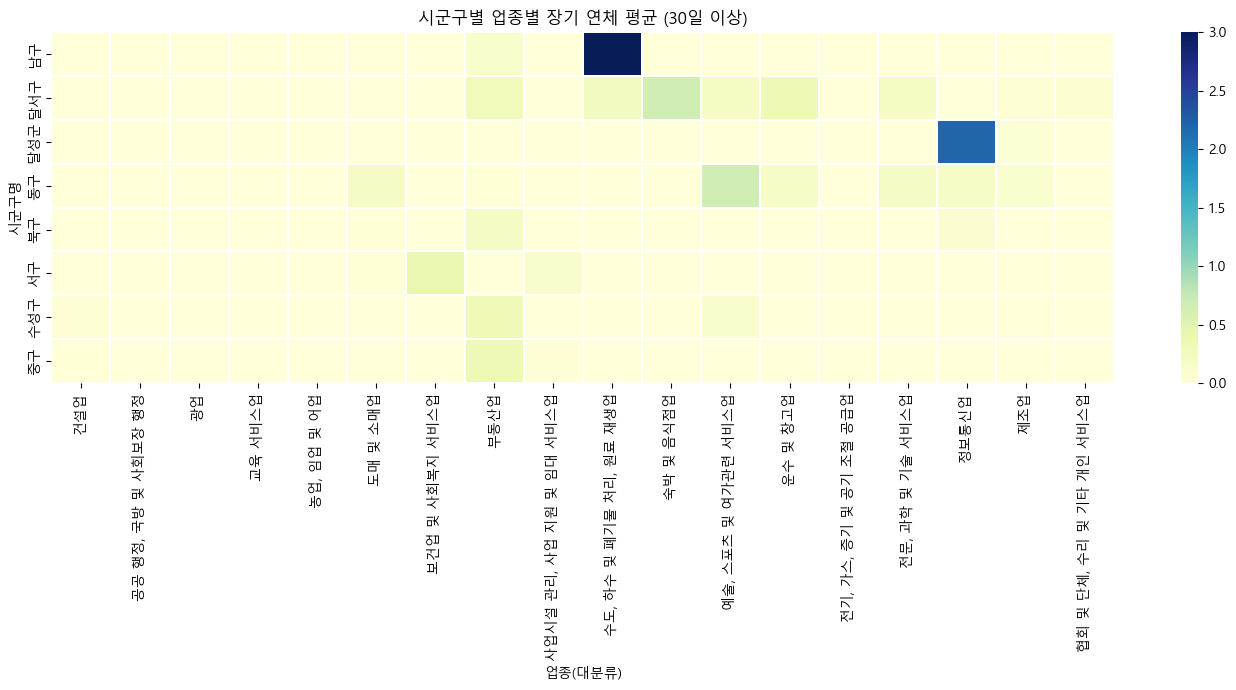

In [26]:
# 집계: 시군구 + 업종별 평균 연체
pivot = daegu.groupby(['시군구명', '업종(대분류)'])['30일이상'].mean().unstack()

# 결측치는 0으로 채우기
pivot = pivot.fillna(0)

# 시각화 (heatmap)
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, annot=False, cmap='YlGnBu', linewidths=0.3)
plt.title('시군구별 업종별 장기 연체 평균 (30일 이상)')
plt.xlabel('업종(대분류)')
plt.ylabel('시군구명')
plt.tight_layout()
plt.show()

In [27]:
# 위 pivot 테이블 재사용
top_risk = pivot.stack().sort_values(ascending=False)
print(top_risk.head(10))

시군구명  업종(대분류)                
남구    수도, 하수 및 폐기물 처리, 원료 재생업    3.000000
달성군   정보통신업                      2.200000
달서구   숙박 및 음식점업                  0.666667
동구    예술, 스포츠 및 여가관련 서비스업        0.666667
서구    보건업 및 사회복지 서비스업            0.400000
중구    부동산업                       0.333333
달서구   운수 및 창고업                   0.333333
수성구   부동산업                       0.321429
달서구   부동산업                       0.290323
      수도, 하수 및 폐기물 처리, 원료 재생업    0.250000
dtype: float64


C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\10658467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=public_info.index, y=public_info.values, palette='Reds')


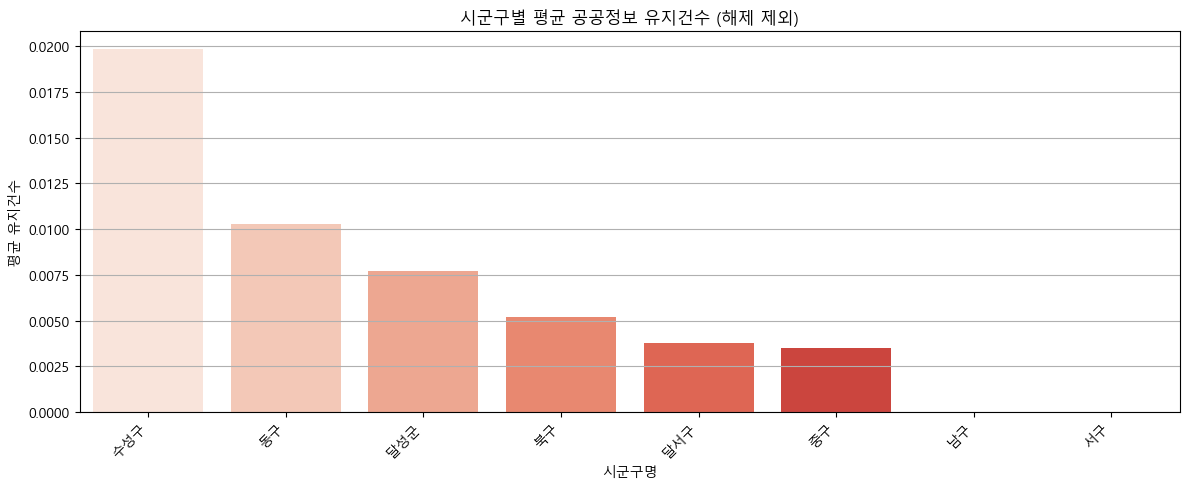

In [29]:
# 2. 공공정보 유지건수 평균 (해제 제외)
public_info = daegu.groupby('시군구명')['기준년월 시점 공공정보 (한국신용정보원) 유지건수(해제 제외)'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=public_info.index, y=public_info.values, palette='Reds')
plt.title('시군구별 평균 공공정보 유지건수 (해제 제외)')
plt.ylabel('평균 유지건수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\2843280139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_risk.index, y=credit_risk.values, palette='Oranges')


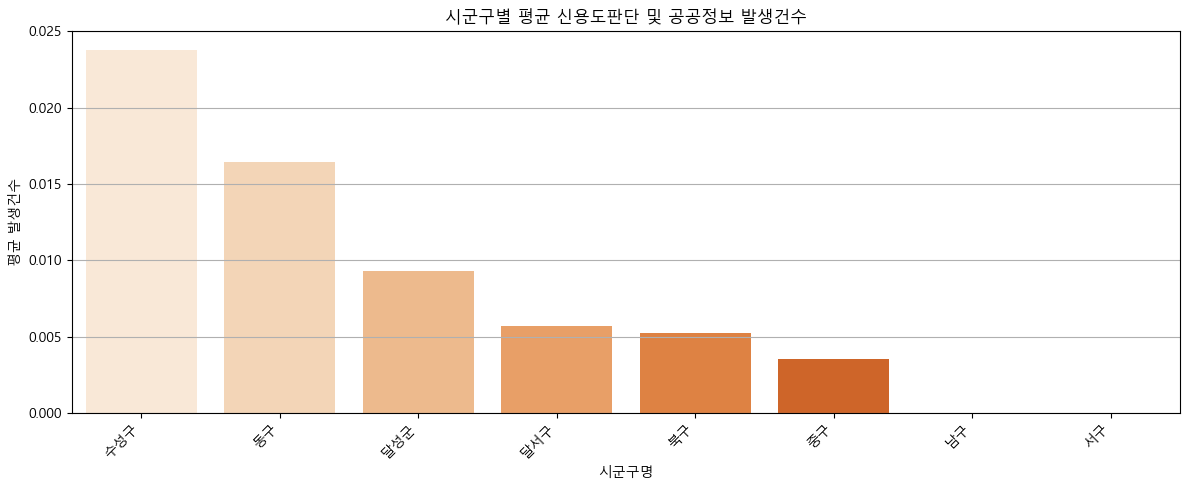

In [30]:
# 3. 신용도 판단정보 및 공공정보 발생건수 평균
credit_risk = daegu.groupby('시군구명')['기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 발생건수(해제 제외)'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=credit_risk.index, y=credit_risk.values, palette='Oranges')
plt.title('시군구별 평균 신용도판단 및 공공정보 발생건수')
plt.ylabel('평균 발생건수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
col = '기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수'
print(daegu[col].describe())

count    4.154000e+03
mean     9.612422e+08
std      1.930404e+08
min      0.000000e+00
25%      1.000000e+09
50%      1.000000e+09
75%      1.000000e+09
max      1.000000e+09
Name: 기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수, dtype: float64


C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\1916498967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elapsed_days.index, y=elapsed_days.values, palette='Greens')


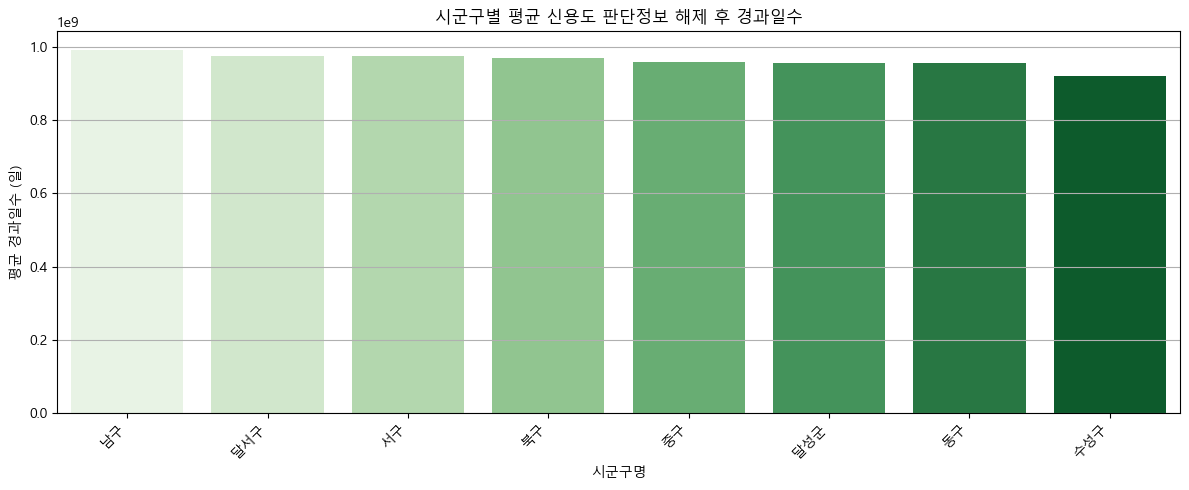

In [31]:
# 4. 신용도 판단 해제 후 경과일수 평균
elapsed_days = daegu.groupby('시군구명')['기준년월 시점 신용도판단정보 및 공공정보 (한국신용정보원) 최근 해제일자로 부터 경과일수'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=elapsed_days.index, y=elapsed_days.values, palette='Greens')
plt.title('시군구별 평균 신용도 판단정보 해제 후 경과일수')
plt.ylabel('평균 경과일수 (일)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_14212\644977141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=boodoyul.index, y=boodoyul.values, palette='coolwarm')


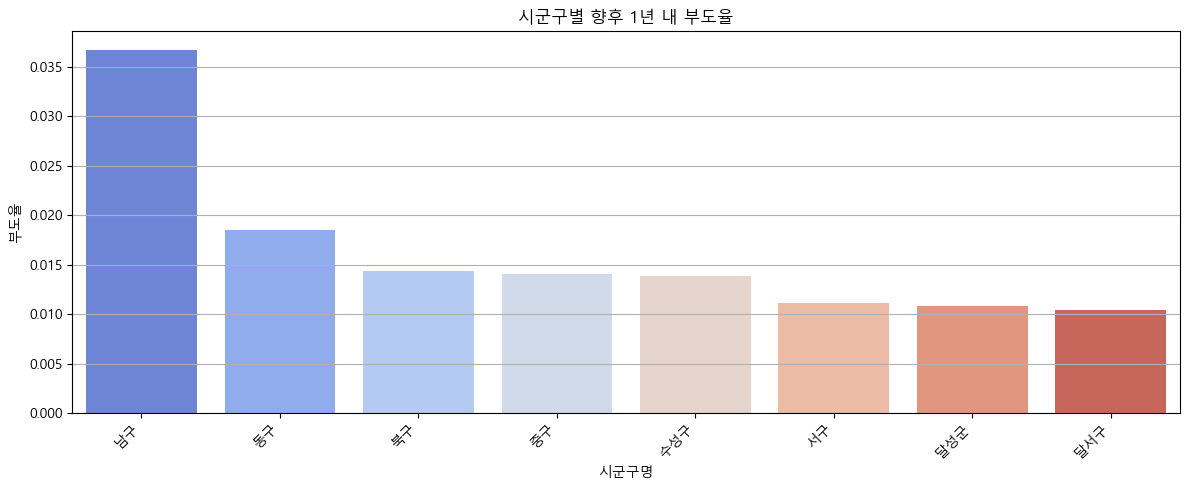

In [33]:
# 5. 시군구별 부도율
boodoyul = daegu.groupby('시군구명')['부도'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=boodoyul.index, y=boodoyul.values, palette='coolwarm')
plt.title('시군구별 향후 1년 내 부도율')
plt.ylabel('부도율')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()